C:\Users\arpit\AppData\Local\Temp\ipykernel_13392\54101191.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(r"C:\Users\arpit\Pictures\Screenshots\Screenshot 2023-04-09 211822.png", pilmode='L').astype(np.float32)  # Adjust path and loading mode accordingly
C:\Users\arpit\AppData\Local\Temp\ipykernel_13392\54101191.py:23: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(fx*2 + fy*2)


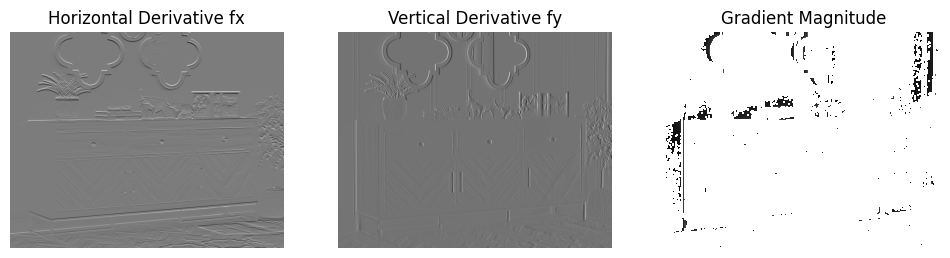

In [13]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.signal import sepfir2d

# Load an example image (make sure to load it as grayscale)
image = imageio.imread(r"C:\Users\arpit\Pictures\Screenshots\Screenshot 2023-04-09 211822.png", pilmode='L').astype(np.float32)  # Adjust path and loading mode accordingly

# Define the separable kernels for horizontal and vertical derivatives
# kernel_x = np.array([0.1250, 0, -0.1250])
# kernel_y = np.array([0.1250,  0,  0.1250])

kernel_x = np.array([0.40824829, 0.81649658, 0.40824829],dtype=np.float32)
kernel_y = np.array([-0.70710678, 0, 0.70710678],dtype=np.float32)

# Apply the separable filters for the horizontal derivative
fx = sepfir2d(image, kernel_x, kernel_y)

# Apply the separable filters for the vertical derivative
fy = sepfir2d(image, kernel_y, kernel_x)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(fx*2 + fy*2)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(fx, cmap='gray')
plt.title('Horizontal Derivative fx')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(fy, cmap='gray')
plt.title('Vertical Derivative fy')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()